# Predict Austrulia Weather


# 🌦️ Predicting Rainfall in Australia

**Dataset Source:** Kaggle – *Australian Weather Dataset*  
- Contains **10 years of historical weather data** across multiple cities.  
- Includes daily measurements such as temperature, humidity, wind, and rainfall.  

**Goal:**  
Build models and visualizations to **predict whether it will rain tomorrow** and extract insights about weather patterns in Australia.  

**Why Useful?**  
- Helps understand seasonal & regional rainfall trends.  
- Supports better planning for agriculture, water management, and daily activities.  


**Step 1: Import Essential Libraries**

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline
!pip install opendatasets --quiet
import opendatasets as od
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

loading the dataset od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

In [2]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')
os.listdir('weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: A'laa kamal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 572MB/s]

['weatherAUS.csv']

reading the data with pandas libirary


In [3]:
df=pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

showing the first 5 rows


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data cleaning and prepration



1. look at the data and the columns
2. fix any missing data or incorrect values
3. scale the data



In [5]:
df.info()
num_cols = df.select_dtypes(include=['int64','float64']).columns
print("Integer columns:", num_cols.tolist())
cat_cols = df.select_dtypes(include=['object']).columns
print("Integer columns:", cat_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

discription of some statistics in te dataset

In [6]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Ask and answer qeustions about the  data
# 📝 Questions I Explored / Answered

- Which season receives the most rainfall in Australia?  
- Does it rain more in the morning (9AM) or in the afternoon (3PM)?  
- Which locations in Australia experience the highest rainfall?  
- How frequently does it rain (today vs tomorrow) across the dataset?  
- What is the relationship between rainfall and humidity (9AM and 3PM)?  
- How do season and location together affect rainfall?  
- What are the top 5 cities with the highest rainfall per season?  
- Are there strong correlations between numeric weather features?  






In [7]:
# first i will clean the data find the missing values
print("Total null values:", df.isnull().sum().sum())
print("Total non-null values:", df.notnull().sum().sum())


Total null values: 343248
Total non-null values: 3002332


see how many columns are there because there is a lot of missing data here

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
WindSpeed9am      1.214767
Temp9am           1.214767
MinTemp           1.020899
MaxTemp           0.866905
Date              0.000000
Location          0.000000
dtype: float64


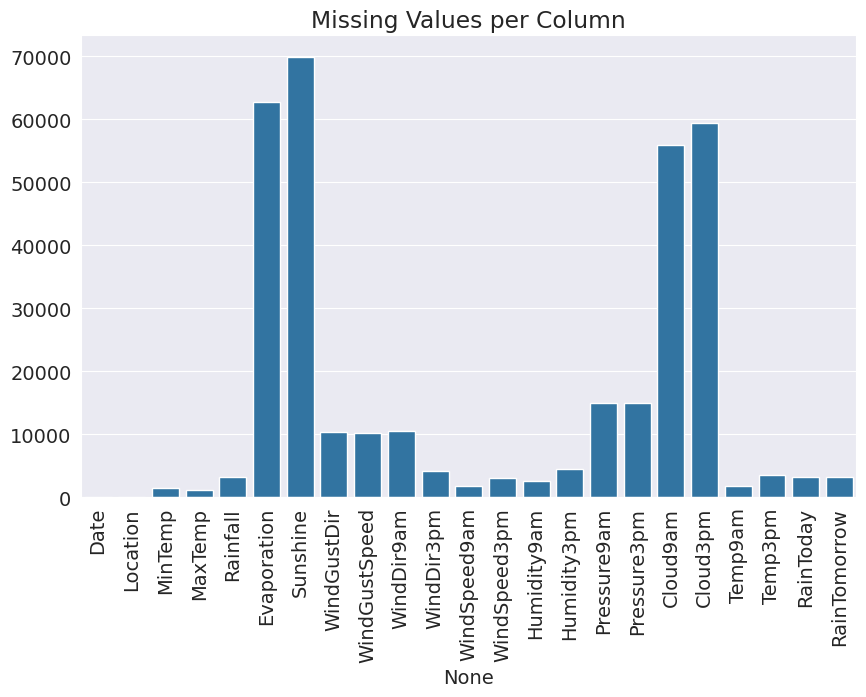

In [8]:
df.shape
#  see the presentage  to decide drop or fill
null_percent = (df.isnull().sum() / len(df)) * 100
print(null_percent.sort_values(ascending=False))
sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
plt.xticks(rotation=90)  # rotate labels so they don’t overlap
plt.title("Missing Values per Column")
plt.show()

*Columns Sunshine, Evaporation, Cloud3pm, and Cloud9am have >40% missing values. These were dropped to avoid noise. Numeric features were imputed using median, categorical using mode. This ensures no data loss from minor missing values, while keeping dataset quality high.*

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


num_pipe = Pipeline([("imputer", SimpleImputer(strategy="median"))])
cat_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent"))])

preprocessor = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

cleaned_array = preprocessor.fit_transform(df)
num_features = num_cols
cat_features = cat_cols  # after imputation we don’t lose names
all_features = list(num_features) + list(cat_features)

cleaned_df = pd.DataFrame(cleaned_array, columns=all_features, index=df.index)
# Convert numeric columns properly
for col in num_cols:
    cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')



#  see the presentage  to decide drop or fill
null_percent = (cleaned_df.isnull().sum() / len(cleaned_df)) * 100
print(null_percent.sort_values(ascending=False))
cleaned_df.head()

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
Date             0.0
Location         0.0
WindGustDir      0.0
WindDir9am       0.0
WindDir3pm       0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,2008-12-01,Albury,W,W,WNW,No,No
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,2008-12-03,Albury,WSW,W,WSW,No,No
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,2008-12-04,Albury,NE,SE,E,No,No
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008-12-05,Albury,W,ENE,NW,No,No


*I built a pipeline so that data cleaning is consistent, automatic, and reusable. This way, whenever new data comes in, the same steps are applied without me having to re-code everything.*

Numeric shape: (145460, 16)


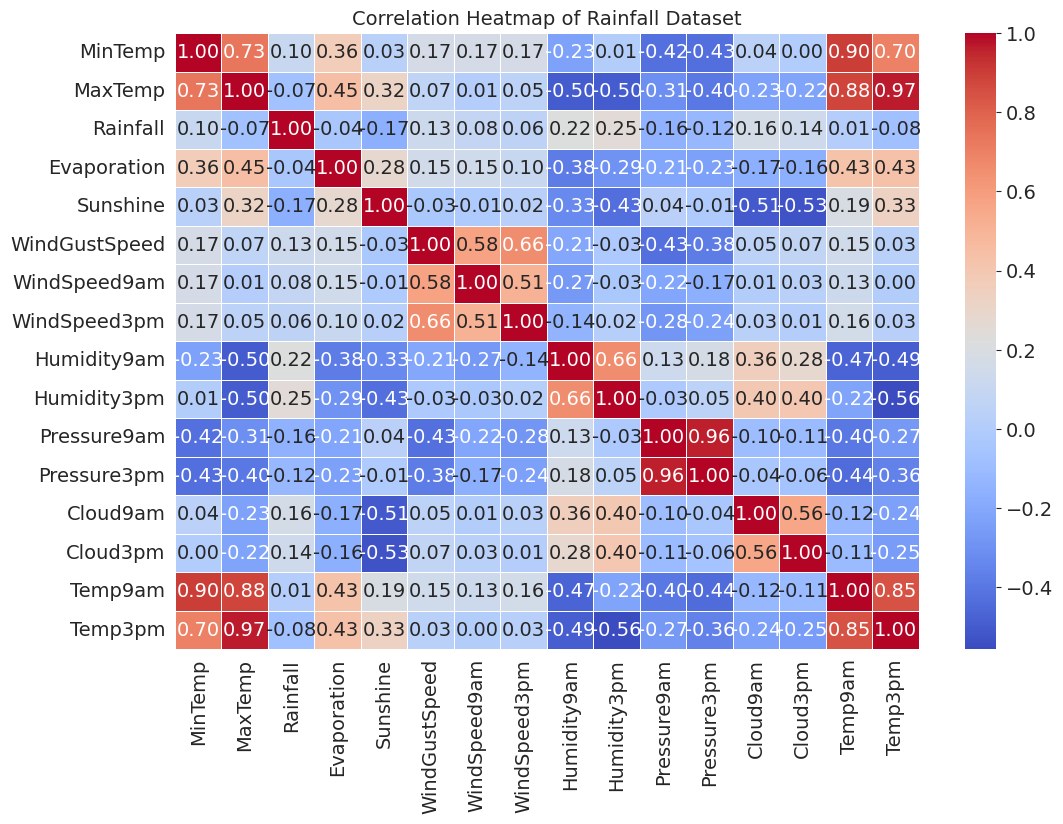

In [10]:
# Select only numeric columns
numeric_df = cleaned_df.select_dtypes(include=['float64', 'int64'])

# Check shape
print("Numeric shape:", numeric_df.shape)

# Compute correlation
cr = numeric_df.corr()

mask = np.abs(cr) > 0.8
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Rainfall Dataset", fontsize=14)
plt.show()


**there are some columns that have a strong correlation between the other columns**

check the number of the cities in the data  set

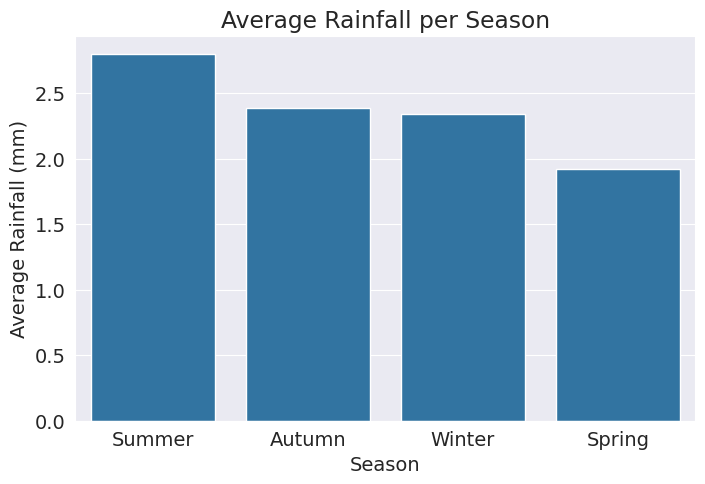

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
cleaned_df = df.copy()

if 'Season' in cleaned_df.columns:
    cleaned_df.drop(columns=['Season'], inplace=True)

cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], errors='coerce')
cleaned_df['Month'] = cleaned_df['Date'].dt.month

def season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'
    else:
        return np.nan

cleaned_df['Season'] = cleaned_df['Month'].apply(season)
df_plot = cleaned_df.dropna(subset=['Rainfall', 'Season'])

plt.figure(figsize=(8,5))
sns.barplot(
    data=df_plot,
    x="Season",
    y="Rainfall",
    estimator=np.mean,
    errorbar=None,
    order=['Summer','Autumn','Winter','Spring']
)
plt.title("Average Rainfall per Season")
plt.ylabel("Average Rainfall (mm)")
plt.show()

### 🌦️ Seasonal Rainfall Analysis

**Objective:**  
Analyze how rainfall varies across different seasons in Australia using historical weather data.

**Steps Performed:**  
- Converted `Date` column to datetime format and extracted `Month`.  
- Grouped months into four seasons:  
  - Summer → Dec, Jan, Feb  
  - Autumn → Mar, Apr, May  
  - Winter → Jun, Jul, Aug  
  - Spring → Sep, Oct, Nov  
- Removed missing values for accurate calculations.  
- Used **Seaborn barplot** to show the **average rainfall per season**.


**Insights:**  
- 🌧️ **Summer** records the highest rainfall.  
- 🍂 **Autumn** and ❄️ **Winter** show moderate rainfall.  
- 🌸 **Spring** is the driest season.


Location
Cairns              5.742035
Darwin              5.092452
CoffsHarbour        5.061497
GoldCoast           3.769396
Wollongong          3.594903
Williamtown         3.591108
Townsville          3.485592
NorahHead           3.387299
Sydney              3.324543
MountGinini         3.292260
Katherine           3.201090
Newcastle           3.183892
Brisbane            3.144891
NorfolkIsland       3.127665
SydneyAirport       3.009917
Walpole             2.906846
Witchcliffe         2.895664
Portland            2.530374
Albany              2.263859
BadgerysCreek       2.193101
Penrith             2.175304
Tuggeranong         2.164043
Dartmoor            2.146567
Richmond            2.138462
MountGambier        2.087562
Launceston          2.011988
Albury              1.914115
Perth               1.906295
Melbourne           1.870062
Watsonia            1.860820
PerthAirport        1.761648
Canberra            1.741720
Ballarat            1.740026
WaggaWagga          1.709946
Pearc

Text(0, 0.5, 'Average Rainfall')

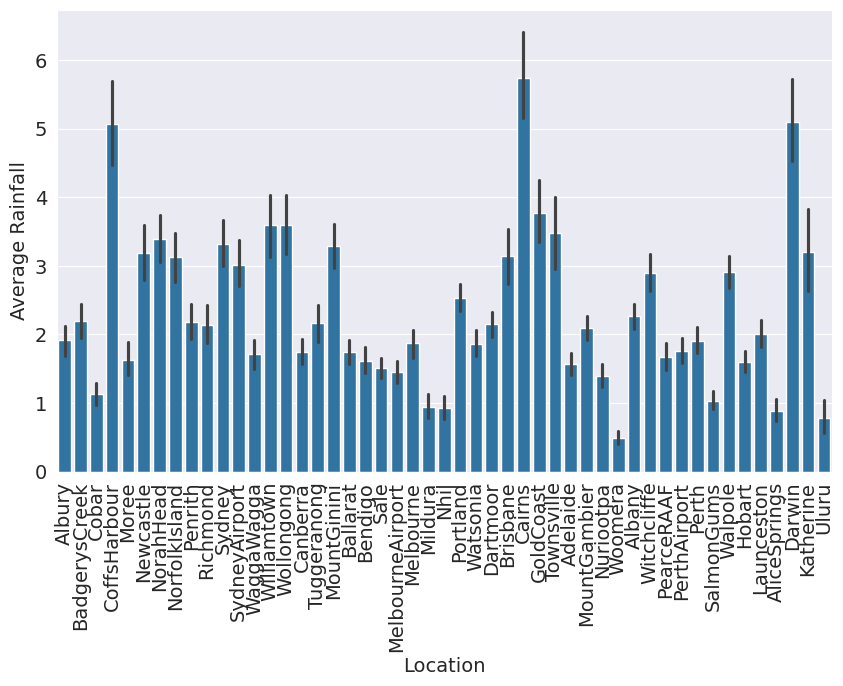

In [12]:
amount_of_rain = cleaned_df.groupby('Location')['Rainfall'].mean().sort_values(ascending=False)
print(amount_of_rain)
sns.barplot(data=cleaned_df,x='Location',y='Rainfall')
plt.xticks(rotation=90)
plt.ylabel("Average Rainfall")



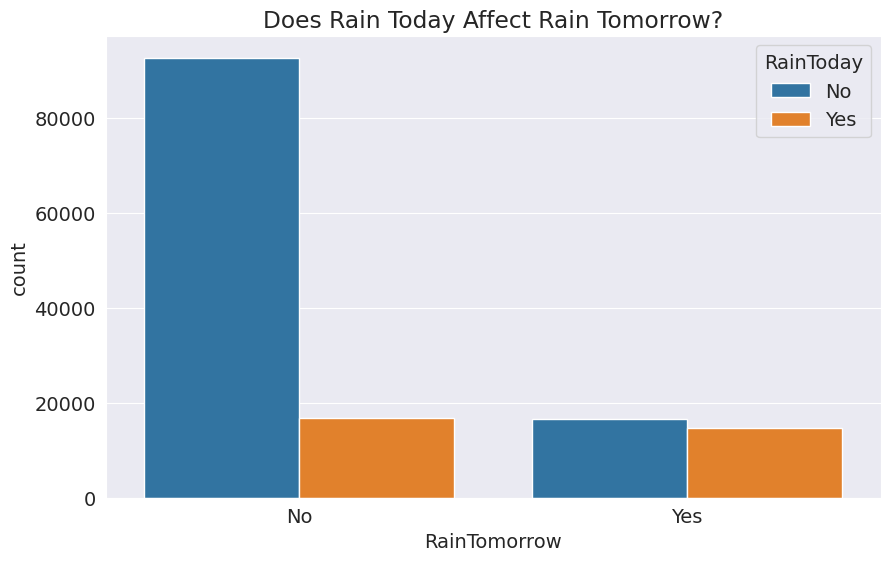

In [13]:
sns.countplot(x="RainTomorrow", hue="RainToday", data=cleaned_df)
plt.title("Does Rain Today Affect Rain Tomorrow?")
plt.show()


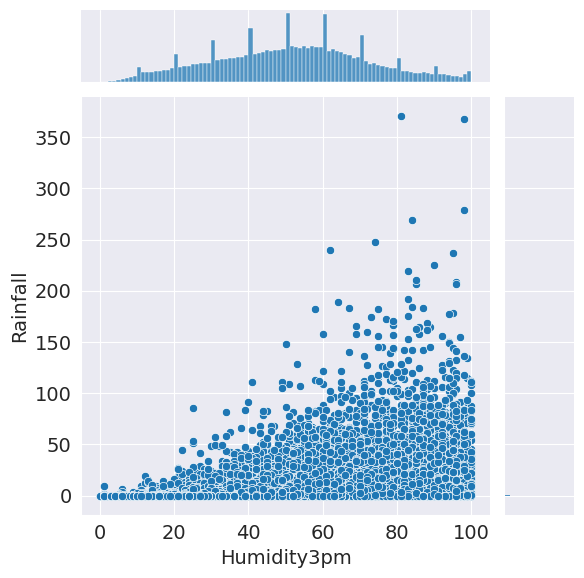

In [14]:
sns.jointplot(x='Humidity3pm', y='Rainfall', data=cleaned_df)
plt.show()



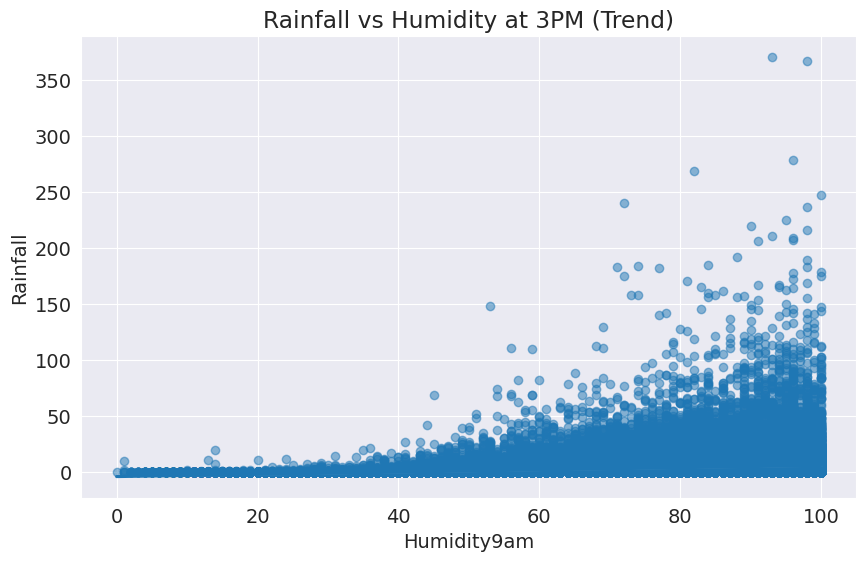

In [15]:
sns.regplot(x='Humidity9am', y='Rainfall', data=cleaned_df, scatter_kws={'alpha':0.5})
plt.title("Rainfall vs Humidity at 3PM (Trend)")
plt.show()


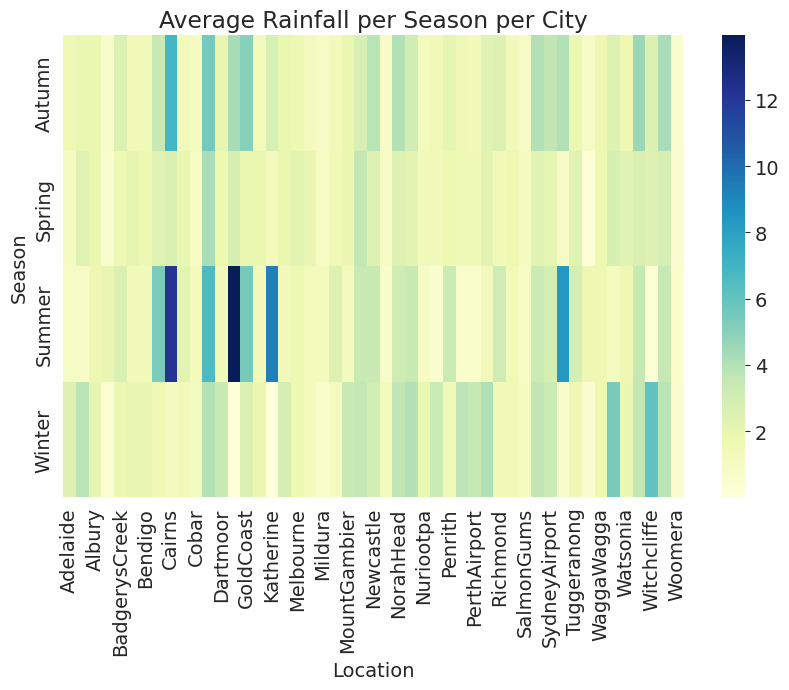

In [16]:
pivot = cleaned_df.pivot_table(values='Rainfall', index='Season', columns='Location', aggfunc='mean')
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Average Rainfall per Season per City")
plt.show()


         Location  Season   Rainfall
54         Darwin  Summer  13.946879
34         Cairns  Summer  12.154263
66      Katherine  Summer   9.308857
158    Townsville  Summer   8.338051
46   CoffsHarbour  Summer   6.646471
         Location  Season  Rainfall
32         Cairns  Autumn  6.875064
44   CoffsHarbour  Autumn  5.502919
56      GoldCoast  Autumn  5.036061
180   Williamtown  Autumn  4.533235
52         Darwin  Autumn  4.302506
          Location  Season  Rainfall
187    Witchcliffe  Winter  6.066048
175        Walpole  Winter  5.413216
135       Portland  Winter  4.077368
47    CoffsHarbour  Winter  3.963206
111  NorfolkIsland  Winter  3.945598
         Location  Season  Rainfall
45   CoffsHarbour  Spring  4.246823
93    MountGinini  Spring  3.560790
53         Darwin  Spring  2.833700
173       Walpole  Spring  2.799073
189    Wollongong  Spring  2.783702


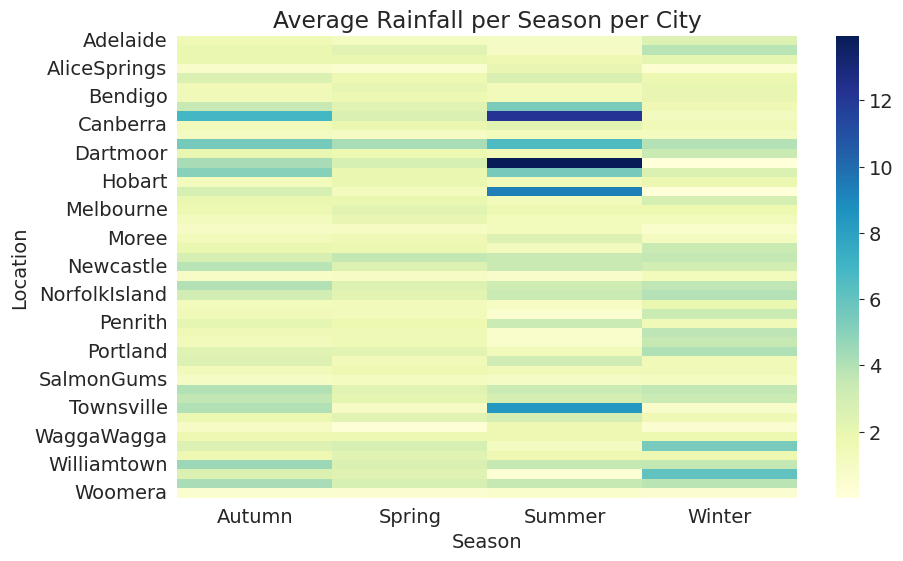

In [17]:
top_5_cities_in_rain=cleaned_df.groupby(['Location','Season'])['Rainfall'].mean().reset_index()
avg_rain_sorted = top_5_cities_in_rain.sort_values(['Season','Rainfall'], ascending=[True, False])
for season in cleaned_df['Season'].unique():
  print(avg_rain_sorted[avg_rain_sorted['Season']==season].head(5))
pivot = cleaned_df.pivot_table(values='Rainfall', index='Location', columns='Season', aggfunc='mean')
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Average Rainfall per Season per City")
plt.show()



### 🌍 Rainiest Cities per Season & Heatmap

- Calculated **average rainfall** for each city and season.  
- Extracted **Top 5 rainiest cities** per season (printed below).  
- Built a **pivot table** (cities × seasons) and visualized it with a **heatmap**.  

**Insight:**  
- Highlights which cities get the most rain in each season.  
- Heatmap makes it easy to spot year-round rainy cities vs. seasonal ones.


# 🌦️ Australia Rainfall – Key Insights

## 1️⃣ Seasonal Rainfall Patterns
- **Summer** has the highest average rainfall across Australia.  
- **Spring** is the driest season on average.  
- Seasonal trends are consistent across most cities.

## 2️⃣ City-wise Rainfall Patterns
- Some cities consistently receive more rainfall than others.  
- The **top 5 wettest cities** vary by season (e.g., Winter vs Summer).  
- Heatmaps illustrate which cities are rainiest in each season.

## 3️⃣ Rain Today vs Rain Tomorrow
- Rain today **increases the likelihood of rain tomorrow**.  
- Useful for simple forecasting models.

## 4️⃣ Rainfall vs Humidity
- Positive correlation exists between **humidity at 3PM/9AM** and rainfall.  
- Higher humidity generally indicates a higher chance of rainfall.

## 5️⃣ Modeling Implications
- **Season** and **Location** are strong predictive features.  
- Including **humidity** or other weather parameters could improve predictions.  
- Data cleaning and handling missing values were done systematically to ensure quality for modeling.
